In [34]:
import pandas as pd
import numpy as np

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
data = pd.read_csv('glaucoma_dataset.csv')

In [36]:
data = data.drop('Patient ID', axis = 1)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Age                                         10000 non-null  int64  
 1   Gender                                      10000 non-null  object 
 2   Visual Acuity Measurements                  10000 non-null  object 
 3   Intraocular Pressure (IOP)                  10000 non-null  float64
 4   Cup-to-Disc Ratio (CDR)                     10000 non-null  float64
 5   Family History                              10000 non-null  object 
 6   Medical History                             7453 non-null   object 
 7   Medication Usage                            8769 non-null   object 
 8   Visual Field Test Results                   10000 non-null  object 
 9   Optical Coherence Tomography (OCT) Results  10000 non-null  object 
 10  Pachymetry 

In [38]:
for coluna in data.columns:
    if data[coluna].dtype == 'float64':
        if data[coluna].isna().any():
            media = data[coluna].mean()
            data[coluna].fillna(media, inplace=True)

for coluna in data.columns:
    if data[coluna].dtype == 'object':
        if data[coluna].isna().any():
            moda = data[coluna].mode().iloc[0]
            data[coluna].fillna(moda, inplace=True)

In [39]:
data.isnull().sum()

Age                                           0
Gender                                        0
Visual Acuity Measurements                    0
Intraocular Pressure (IOP)                    0
Cup-to-Disc Ratio (CDR)                       0
Family History                                0
Medical History                               0
Medication Usage                              0
Visual Field Test Results                     0
Optical Coherence Tomography (OCT) Results    0
Pachymetry                                    0
Cataract Status                               0
Angle Closure Status                          0
Visual Symptoms                               0
Diagnosis                                     0
Glaucoma Type                                 0
dtype: int64

In [40]:
data.describe()

,Age,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Pachymetry
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.872200,17.507527,0.548437,549.733974
std,21.127563,4.356101,0.144326,28.902741
min,18.000000,10.000000,0.300000,500.010000
25%,36.000000,13.760000,0.420000,524.590000
50%,54.000000,17.485000,0.550000,549.335000
75%,72.000000,21.300000,0.670000,574.972500
max,90.000000,25.000000,0.800000,599.990000


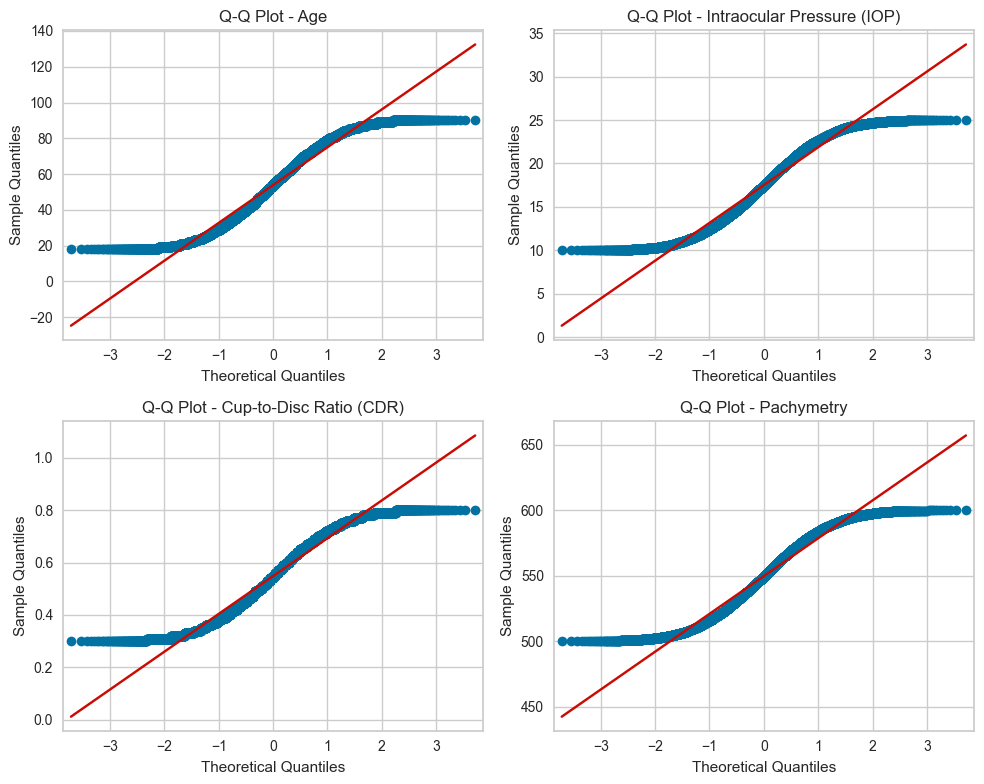

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Q-Q plot para 'Age'
sm.qqplot(data['Age'], line='s', ax=axs[0, 0])
axs[0, 0].set_title('Q-Q Plot - Age')

# Q-Q plot para 'Intraocular Pressure (IOP)'
sm.qqplot(data['Intraocular Pressure (IOP)'], line='s', ax=axs[0, 1])
axs[0, 1].set_title('Q-Q Plot - Intraocular Pressure (IOP)')

# Q-Q plot para 'Cup-to-Disc Ratio (CDR)'
sm.qqplot(data['Cup-to-Disc Ratio (CDR)'], line='s', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot - Cup-to-Disc Ratio (CDR)')

# Q-Q plot para 'Pachymetry'
sm.qqplot(data['Pachymetry'], line='s', ax=axs[1, 1])
axs[1, 1].set_title('Q-Q Plot - Pachymetry')

plt.tight_layout()
plt.show()

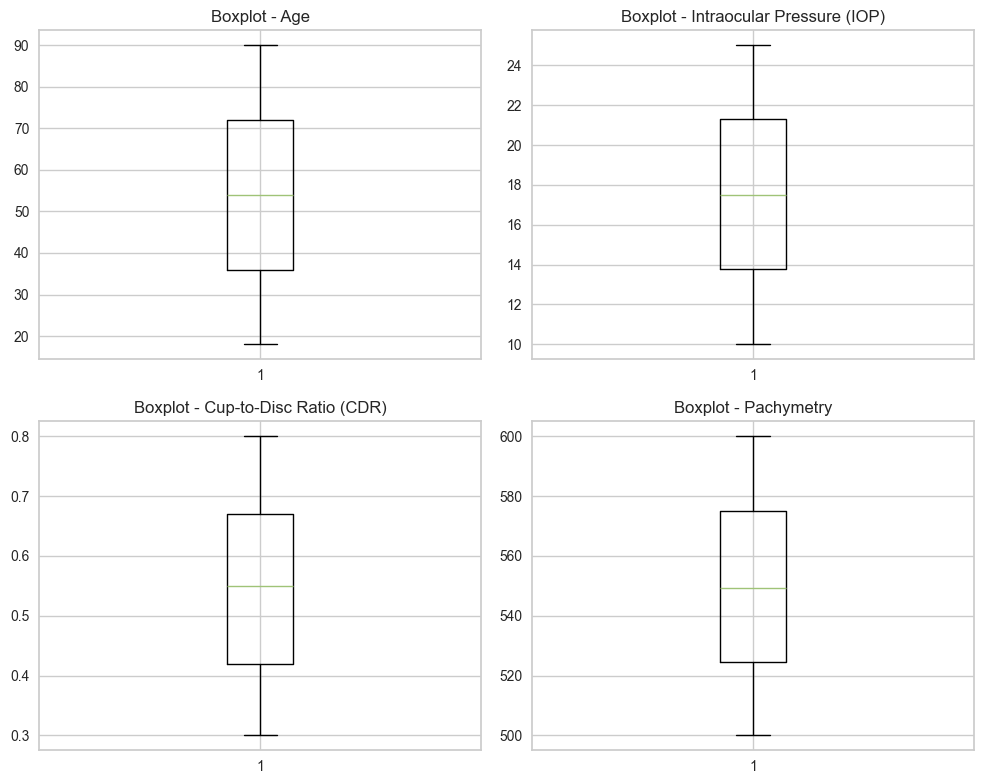

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Boxplot para 'Age'
axs[0, 0].boxplot(data['Age'])
axs[0, 0].set_title('Boxplot - Age')

# Boxplot para 'Intraocular Pressure (IOP)'
axs[0, 1].boxplot(data['Intraocular Pressure (IOP)'])
axs[0, 1].set_title('Boxplot - Intraocular Pressure (IOP)')

# Boxplot para 'Cup-to-Disc Ratio (CDR)'
axs[1, 0].boxplot(data['Cup-to-Disc Ratio (CDR)'])
axs[1, 0].set_title('Boxplot - Cup-to-Disc Ratio (CDR)')

# Boxplot para 'Pachymetry'
axs[1, 1].boxplot(data['Pachymetry'])
axs[1, 1].set_title('Boxplot - Pachymetry')

plt.tight_layout()
plt.show()

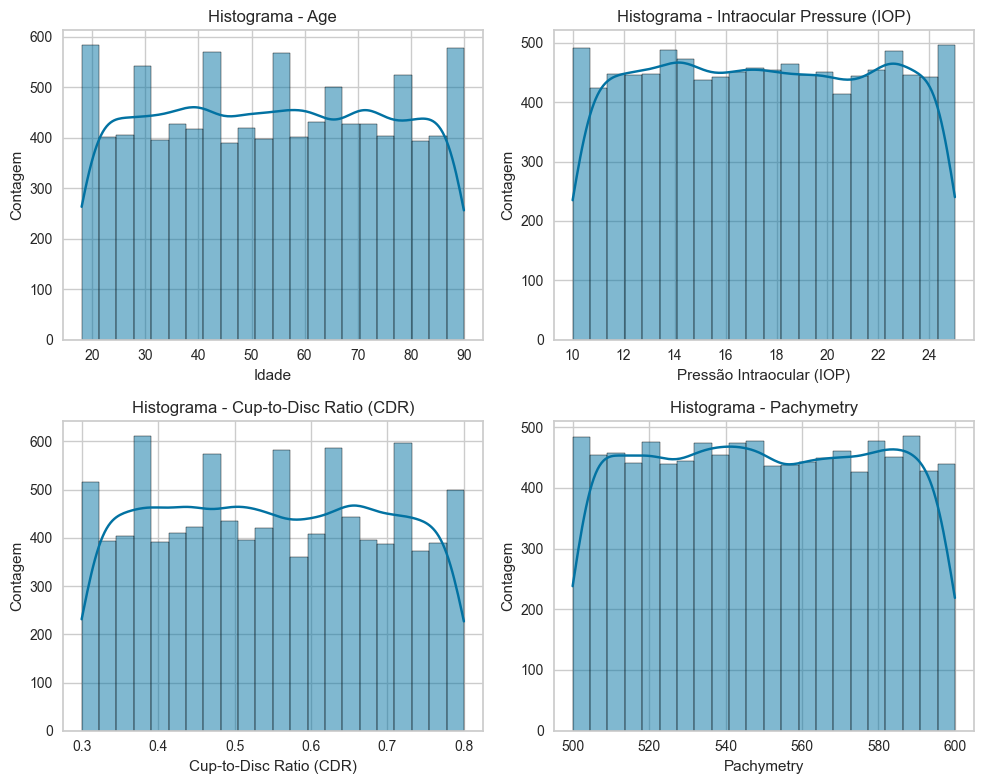

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Histograma para 'Age'
sns.histplot(data['Age'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Histograma - Age')
axs[0, 0].set_xlabel('Idade')
axs[0, 0].set_ylabel('Contagem')

# Histograma para 'Intraocular Pressure (IOP)'
sns.histplot(data['Intraocular Pressure (IOP)'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Histograma - Intraocular Pressure (IOP)')
axs[0, 1].set_xlabel('Pressão Intraocular (IOP)')
axs[0, 1].set_ylabel('Contagem')

# Histograma para 'Cup-to-Disc Ratio (CDR)'
sns.histplot(data['Cup-to-Disc Ratio (CDR)'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Histograma - Cup-to-Disc Ratio (CDR)')
axs[1, 0].set_xlabel('Cup-to-Disc Ratio (CDR)')
axs[1, 0].set_ylabel('Contagem')

# Histograma para 'Pachymetry'
sns.histplot(data['Pachymetry'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Histograma - Pachymetry')
axs[1, 1].set_xlabel('Pachymetry')
axs[1, 1].set_ylabel('Contagem')

plt.tight_layout()
plt.show()

In [44]:
previsores = data.iloc[: , :-1].values
classe = data.iloc[: , -1].values

In [45]:
labelencoder = LabelEncoder()

columns_to_encode = [1, 2, 5, 6, 7, 8, 9, 11, 12, 13, 14]

for col in columns_to_encode:
    previsores[:, col] = labelencoder.fit_transform(previsores[:, col])

In [46]:
scaler = MinMaxScaler()
previsores = scaler.fit_transform(previsores)

In [47]:
classe = labelencoder.fit_transform(classe)
classe_dummy = to_categorical(classe)
classe_dummy

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(previsores, classe_dummy,
                                                    test_size=0.2, random_state=42)

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()

model.fit(x_train, y_train)

importancias = model.feature_importances_
importancias

array([0.09335547, 0.02731399, 0.06211153, 0.0944667 , 0.09208292,
       0.0232353 , 0.0466997 , 0.09149643, 0.09463681, 0.09567038,
       0.09501289, 0.0284994 , 0.02973741, 0.09564533, 0.03003572])

In [50]:
x_train = x_train[:, [0, 3, 4, 7, 8, 9, 10, 13]]
x_test = x_test[:, [0, 3, 4, 7, 8, 9, 10, 13]]

In [51]:
forest = RandomForestClassifier(n_estimators=10)
forest.fit(x_test, y_test)

RandomForestClassifier(n_estimators=10)

In [52]:
y_pred = forest.predict(x_test)
y_pred = (y_pred > 0.9)

In [53]:
y_test_matrix = [np.argmax(t) for t in y_test]
y_pred_matrix = [np.argmax(t) for t in y_pred]

In [54]:
matriz = confusion_matrix(y_test_matrix, y_pred_matrix)
matriz

array([[340,   0,   0,   0,   0,   0],
       [ 43, 302,   0,   0,   0,   0],
       [ 64,   0, 245,   0,   0,   0],
       [ 62,   0,   0, 277,   0,   0],
       [ 48,   0,   0,   0, 302,   0],
       [ 53,   0,   0,   0,   0, 264]], dtype=int64)

In [55]:
acertos = sum(matriz[i, i] for i in range(len(matriz)))

print(f'Total de acertos na matriz de confusão: {acertos}')

Total de acertos na matriz de confusão: 1730


In [56]:
porcentagem_acertos = acertos / len(y_test)
print(f'Porcentagem de acertos: {porcentagem_acertos * 100:.2f}%')

Porcentagem de acertos: 86.50%


In [57]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do SVM: {accuracy:.2f}')

Acurácia do SVM: 0.83
